In [98]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np

# Visualizing 2-D and 3-D Vectors

### 2-D vectors

<IPython.core.display.Javascript object>


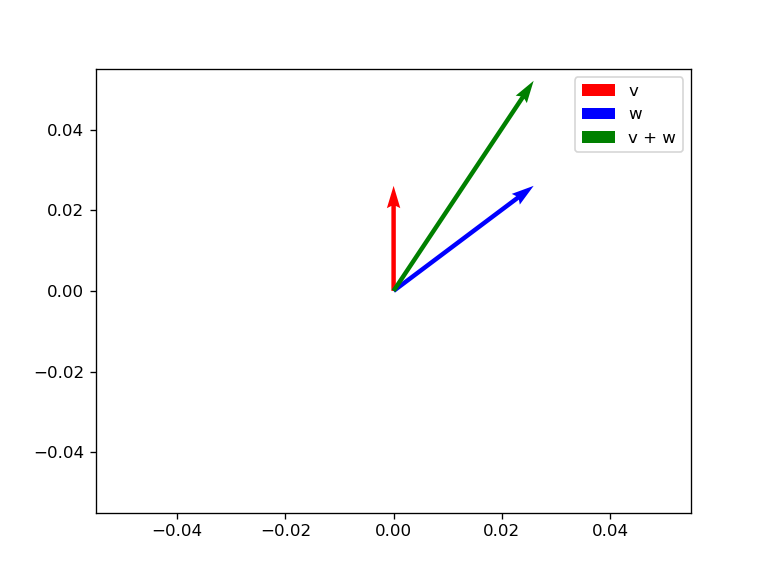

In [99]:
v = np.array([0,3])
w = np.array([4,3])
v_plus_w = v + w
origin = [0], [0] # origin point

plt.figure()
plt.quiver(*origin, v[0], v[1], scale=17, color='r', label='v')
plt.quiver(*origin, w[0], w[1], scale=17, color='b',label='w')
plt.quiver(*origin, v_plus_w[0], v_plus_w[1], scale=17, color='g',label='v + w')
plt.legend()
plt.show()

### 3-D vectors

<IPython.core.display.Javascript object>


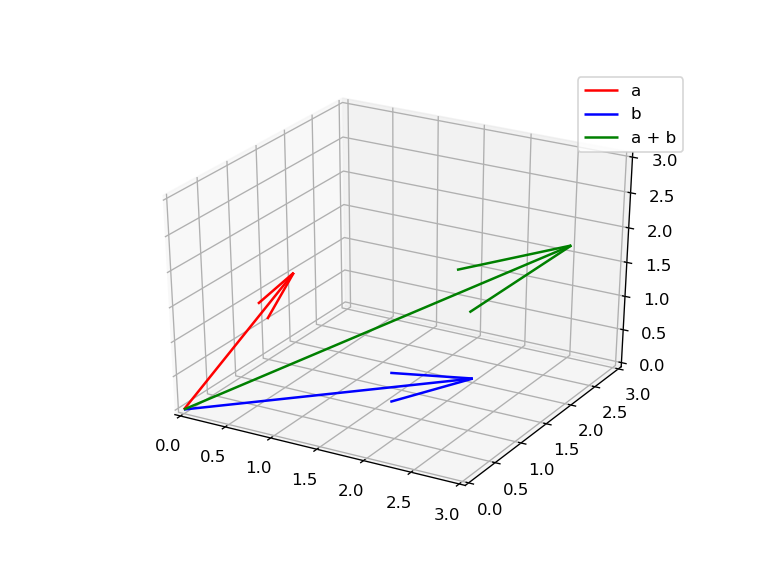

In [100]:
a = np.array([0, 2, 1])
b = np.array([2, 2, 0])
a_plus_b = a + b

origin = [0], [0], [0]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(*origin, a[0], a[1], a[2], color='red', label='a')
ax.quiver(*origin, b[0], b[1], b[2], color='blue',label='b')
ax.quiver(*origin, a_plus_b[0], a_plus_b[1], a_plus_b[2], color='green',label='a + b')
ax.set_xlim([0, 3])
ax.set_ylim([0, 3])
ax.set_zlim([0, 3])
plt.legend()
plt.show()

# Length of a vector

In [101]:
v = np.array([1,3,2])
w = np.array([4,1,7])

In [102]:
def vector_length(v):
    l = 0
    for i in v:
        l += i**2
    length = np.sqrt(l)
    return length

In [6]:
vector_length(v)

3.7416573867739413

### Numpy Linalg

In [103]:
np.linalg.norm(v)

3.7416573867739413

# Dot Product

### From scratch

In [104]:
def dot_product(v,w):
    ans = 0
    for i in range(0, len(v)):
        ans += v[i] * w[i]
        
    return ans

In [105]:
dot_product(v,w)

21

### Numpy Linalg

In [106]:
np.dot(v,w)

21

In [107]:
v @ w

21

## Dot Product of a Matrix and a vector

In [108]:
A = np.array([[1,0,0],[-1,1,0],[0,-1,1]])
x = np.array([4,1,7])

In [109]:
def matrix_vector_product(A, x):
    m, n = A.shape
    b = np.zeros(n)
    
    for i in range(0, m):
        sum_ = 0
        for j in range(0, n):
            sum_ += A[i][j] * x[j]        
        b[i] = sum_
    
    return b

In [110]:
matrix_vector_product(A, x)

array([ 4., -3.,  6.])

### Numpy Linalg

In [111]:
np.array([1,2,3]).reshape(3,1)

array([[1],
       [2],
       [3]])

In [112]:
np.dot(A, x)

array([ 4, -3,  6])

# System of Linear Equations

We want to solve equations such as this:

$x - 2y = 1$ <br />
$3x + 2y = 11$

### In 2-D space, the ROW PICTURE tells us that two lines meet at a single point (the solution).

In [113]:
x = np.linspace(0, 5)
x

y1 = (x/2) - 0.5
y2 = (-3*x/2) + (11/2)

<IPython.core.display.Javascript object>


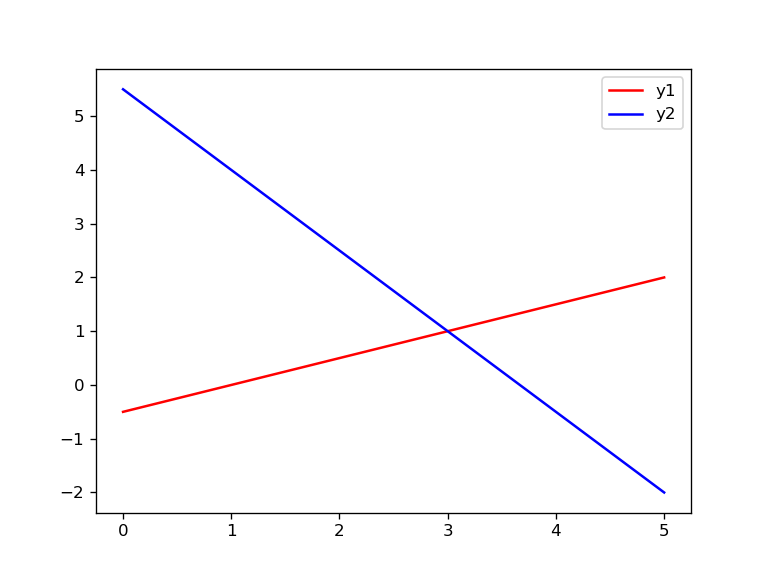

In [114]:
plt.figure()

plt.plot(x, y1, color='r', label='y1')
plt.plot(x, y2, color='b', label='y2')
plt.legend()

### The COLUMN PICTURE produces a vector $\vec{b}$

<IPython.core.display.Javascript object>


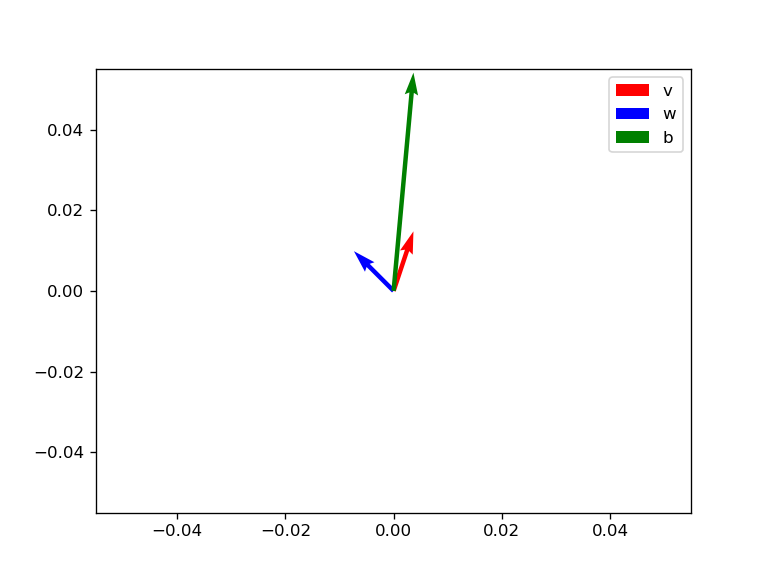

In [19]:
v = np.array([1,3])
w = np.array([-2,2])
b = np.array([1,11])
origin = [0], [0] # origin point

plt.figure()
plt.quiver(*origin, v[0], v[1], scale=30, color='r', label='v')
plt.quiver(*origin, w[0], w[1], scale=30, color='b',label='w')
plt.quiver(*origin, b[0], b[1], scale=30, color='g',label='b')
plt.legend()
plt.show()

# Scalar multiplication

In [115]:
c = 3
v = np.array([1,3])

c*v

array([3, 9])

# Vector addition

### From scratch

In [116]:
v = np.array([3, 9])
w = np.array([-2, 2])

In [117]:
b = np.zeros(len(v))

for i in range(0, len(v)):
    b[i] = v[i] + w[i]
    
b

array([ 1., 11.])

### Using numpy

In [118]:
v + w

array([ 1, 11])

### To solve for the $\vec{x}$ vector, we simply use numpy

In [119]:
A = np.array([[1, -2],
              [3, 2]])

In [120]:
np.linalg.solve(A, b)

array([3., 1.])

# Solving for 3 equations with 3 unknowns

In [121]:
A = np.array([[1,2,3],
              [2,5,2],
              [6,-3,1]])

b = np.array([6,4,2])

In [122]:
x = np.zeros(len(b))
x

array([0., 0., 0.])

In [123]:
g = np.linalg.solve(A, b)
for i in range(0, len(g)):
    x[i] = int(g[i])
    
x

array([0., 0., 2.])

# Matrix multiplication

### Multiplying symmetric matrices

In [124]:
def matrix_multiplication(A, B):
    if len(A.shape)==1:
        A = A.reshape((A.shape[0],1))
    if len(B.shape)==1:
        B = B.reshape((B.shape[0],1))
    
    m = A.shape[0]
    n = B.shape[1]
    
    b = np.zeros((m, n))
    
    for i in range(0, m):
        for j in range(0, n):
            # dot product of a row from A with a column from B 
            b[i][j] = sum(k * l for k, l in zip(A[i], B[:,j]))# or A[i] @ B[:,j]
            
    if len(b[0])==1:
        b = b.reshape((b.shape[0],))
        
    return b

In [125]:
A = np.array([[1,3],
              [4,7]])

B = np.array([[6,2],
              [1,5]])

matrix_multiplication(A, B)

array([[ 9., 17.],
       [31., 43.]])

### Numpy linalg

In [126]:
A @ B

array([[ 9, 17],
       [31, 43]])

### Multiplying matrices with different dimensions

In [127]:
A = np.array([[1,7, 3],
              [13,9,5]])

B = np.array([[5,1],
              [3,19],
              [6,2]])

matrix_multiplication(A, B)

array([[ 44., 140.],
       [122., 194.]])

In [128]:
A = np.array([[1,2, 4],
              [-2,3,1],
              [-4,1,2]])

B = np.array([[2],[2],[3]])

matrix_multiplication(A, B)

array([18.,  5.,  0.])

### Matrix with a vector

In [129]:
A = np.array([[2,1,0,0],
              [1,2,1,0],
              [0,1,2,1],
              [0,0,1,2]])

B = np.array([1,1,1,2])

matrix_multiplication(A, B)

array([3., 4., 5., 5.])

### Vector on a vector

In [130]:
A = np.array([1,3,2,6])

B = np.array([3,5,1,2])

matrix_multiplication(A, B)

array([ 3.,  9.,  6., 18.])

### Random matrices

In [131]:
A = np.random.rand(5,5)
b = np.random.rand(5)
np.linalg.solve(A,b)

array([ 0.28919806,  1.49814201,  1.32961988, -0.08639229, -1.0910664 ])

In [132]:
matrix_multiplication(A, b)

array([1.49315007, 1.6446106 , 0.70742759, 1.17656633, 1.98638802])